In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1i4fdQmP-qxCyPLyYvCADtJNnigl73UUB'

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Filename.csv')
train = pd.read_csv('Filename.csv', encoding='latin-1')

link2 = 'https://drive.google.com/open?id=1-waV7LKl6lIPnC0URPLTozNyJ3f_9CWl'

fluff, id = link2.split('=')

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Filename.csv')
census = pd.read_csv('Filename.csv', encoding='latin-1')

link3 = 'https://drive.google.com/open?id=1vZbjPxlv0ReQauUGSzcYEb2OD5xCvVqM'

fluff, id = link3.split('=')

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Filename.csv')
revealedtest = pd.read_csv('Filename.csv', encoding='latin-1')

# link4 = 'https://drive.google.com/open?id=13Bj6IQK6RZMmpov2WzOnG2BOmGAXOZrC'

# fluff, id = link4.split('=')

# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Filename.csv')
# hiddentest = pd.read_csv('Filename.csv', encoding='latin-1')

In [ ]:
revealedtest.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2022-11-01,1001,Autauga County,Alabama,2022-11-01,3.442677,1463
1,1001_2022-12-01,1001,Autauga County,Alabama,2022-12-01,3.470915,1475
2,1003_2022-11-01,1003,Baldwin County,Alabama,2022-11-01,8.257636,14145
3,1003_2022-12-01,1003,Baldwin County,Alabama,2022-12-01,8.250630,14133
4,1005_2022-11-01,1005,Barbour County,Alabama,2022-11-01,1.247223,247


In [ ]:
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [ ]:
mbd = pd.concat([train, revealedtest], ignore_index=True, axis=0)

In [ ]:
mbd.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [ ]:
census.head()

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0


In [ ]:
print(f"microbusiness density shape: {mbd.shape}")
print(f"census data shape: {census.shape}")

microbusiness density shape: (128535, 7)
census data shape: (3142, 26)


In [ ]:
mbd.isna().sum()

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
dtype: int64

In [ ]:
census.isna().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              1
pct_bb_2021              1
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         1
pct_college_2021         1
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    1
pct_foreign_born_2021    1
pct_it_workers_2017      0
pct_it_workers_2018      1
pct_it_workers_2019      0
pct_it_workers_2020      1
pct_it_workers_2021      1
median_hh_inc_2017       0
median_hh_inc_2018       1
median_hh_inc_2019       0
median_hh_inc_2020       2
median_hh_inc_2021       2
dtype: int64

In [ ]:
census.fillna(census.mean(numeric_only=True).round(1), inplace=True)
census.isna().sum()

pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              0
pct_bb_2021              0
cfips                    0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         0
pct_college_2021         0
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    0
pct_foreign_born_2021    0
pct_it_workers_2017      0
pct_it_workers_2018      0
pct_it_workers_2019      0
pct_it_workers_2020      0
pct_it_workers_2021      0
median_hh_inc_2017       0
median_hh_inc_2018       0
median_hh_inc_2019       0
median_hh_inc_2020       0
median_hh_inc_2021       0
dtype: int64

In [ ]:
df = mbd.merge(census, on='cfips', how='left')
df.shape
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0


In [ ]:
df['date'] = pd.to_datetime(df['first_day_of_month'])

# Extract the year from the 'date' column and convert it to string
df['year'] = df['date'].dt.year.astype(int)
df['adjusted_year'] = df['year']-2

# Create a new column 'correct' and assign the values based on the year
for year in [2017, 2018, 2019, 2020, 2021]:
    df.loc[df['adjusted_year'] == year, 'pct_bb'] = df['pct_bb_'+str(year)]
    df.loc[df['adjusted_year'] == year, 'pct_college'] = df['pct_college_'+str(year)]
    df.loc[df['adjusted_year'] == year, 'pct_foreign_born'] = df['pct_foreign_born_'+str(year)]
    df.loc[df['adjusted_year'] == year, 'pct_it_workers'] = df['pct_it_workers_'+str(year)]
    df.loc[df['adjusted_year'] == year, 'median_hh_inc'] = df['median_hh_inc_'+str(year)]

df = df.drop(columns=['date', 'adjusted_year', 'year'])
df = df.drop(columns=['pct_bb_2017', 'pct_bb_2018', 'pct_bb_2019', 'pct_bb_2020', 'pct_bb_2021',
                      'pct_college_2017', 'pct_college_2018', 'pct_college_2019', 'pct_college_2020', 'pct_college_2021',
                      'pct_foreign_born_2017', 'pct_foreign_born_2018', 'pct_foreign_born_2019', 'pct_foreign_born_2020', 'pct_foreign_born_2021',
                      'pct_it_workers_2017', 'pct_it_workers_2018', 'pct_it_workers_2019', 'pct_it_workers_2020', 'pct_it_workers_2021',
                      'median_hh_inc_2017', 'median_hh_inc_2018', 'median_hh_inc_2019', 'median_hh_inc_2020', 'median_hh_inc_2021',])

print(f"Merged dataset shape: {df.shape}")
df.head()

Merged dataset shape: (128535, 12)


,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,14.5,2.1,1.3,55317.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,14.5,2.1,1.3,55317.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,14.5,2.1,1.3,55317.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,14.5,2.1,1.3,55317.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,14.5,2.1,1.3,55317.0


In [ ]:
df.columns

Index(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
       'microbusiness_density', 'active', 'pct_bb', 'pct_college',
       'pct_foreign_born', 'pct_it_workers', 'median_hh_inc'],
      dtype='object')

# Data Visualization

In [ ]:
df.groupby('state')['county'].nunique().sort_values(ascending=False)[:11]

state
Texas             254
Georgia           159
Virginia          130
Kentucky          120
Missouri          115
Kansas            105
Illinois          102
North Carolina    100
Iowa               99
Tennessee          95
Nebraska           92
Name: county, dtype: int64

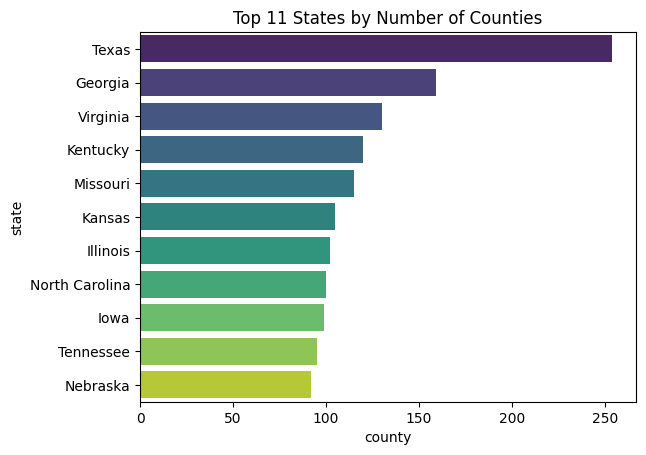

In [ ]:
#Number of counties by state
plt.figure(figsize=((6.4,4.8)))
sns.barplot(y=df.groupby('state')['county'].nunique().sort_values(ascending=False)[:11].index, x=df.groupby('state')['county'].nunique().sort_values(ascending=False)[:11], palette="viridis").set_title('Top 11 States by Number of Counties')
plt.show()

pct_bb- The percentage of households in the county with access to broadband of any type.

pct_college - The percent of the population in the county over age 25 with a 4-year college degree.

pct_foreign_born - The percent of the population in the county born outside of the United States.

pct_it_workers- The percent of the workforce in the county employed in information related industries.

median_hh_inc - The median household income in the county.

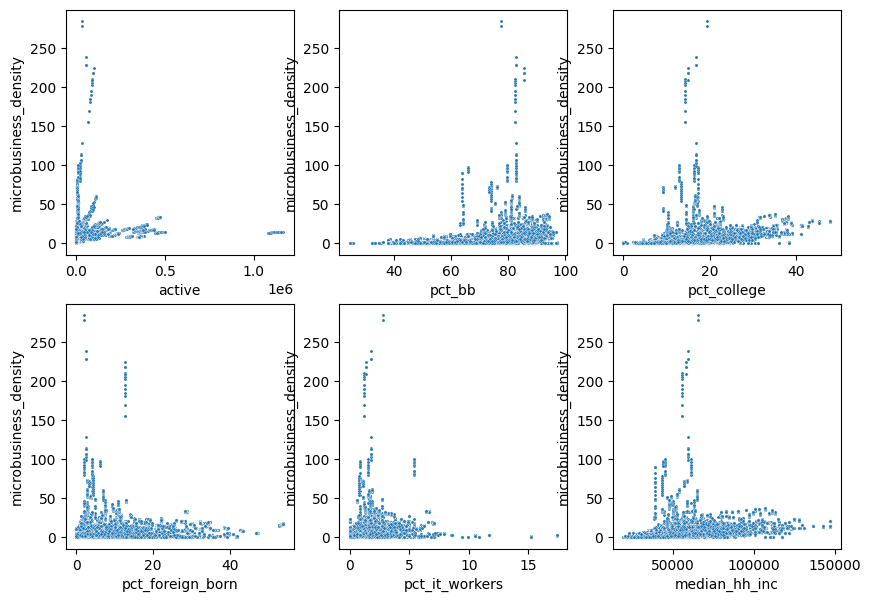

In [ ]:
# relationship between numerical variables and target variables
variables = ['active', 'pct_bb', 'pct_college','pct_foreign_born', 'pct_it_workers', 'median_hh_inc'] #numerical variables

fig, ax = plt.subplots(2, 3, figsize = (10, 7))
for var, subplot in zip(variables, ax.flatten()):
  sns.scatterplot(x = var, y = df['microbusiness_density'], data = df, ax = subplot,s = 5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import geopandas as gpd
usa = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/usa_shapefile/cb_2018_us_state_20m.shp')

<ipython-input-20-19f0a79c4138>:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):


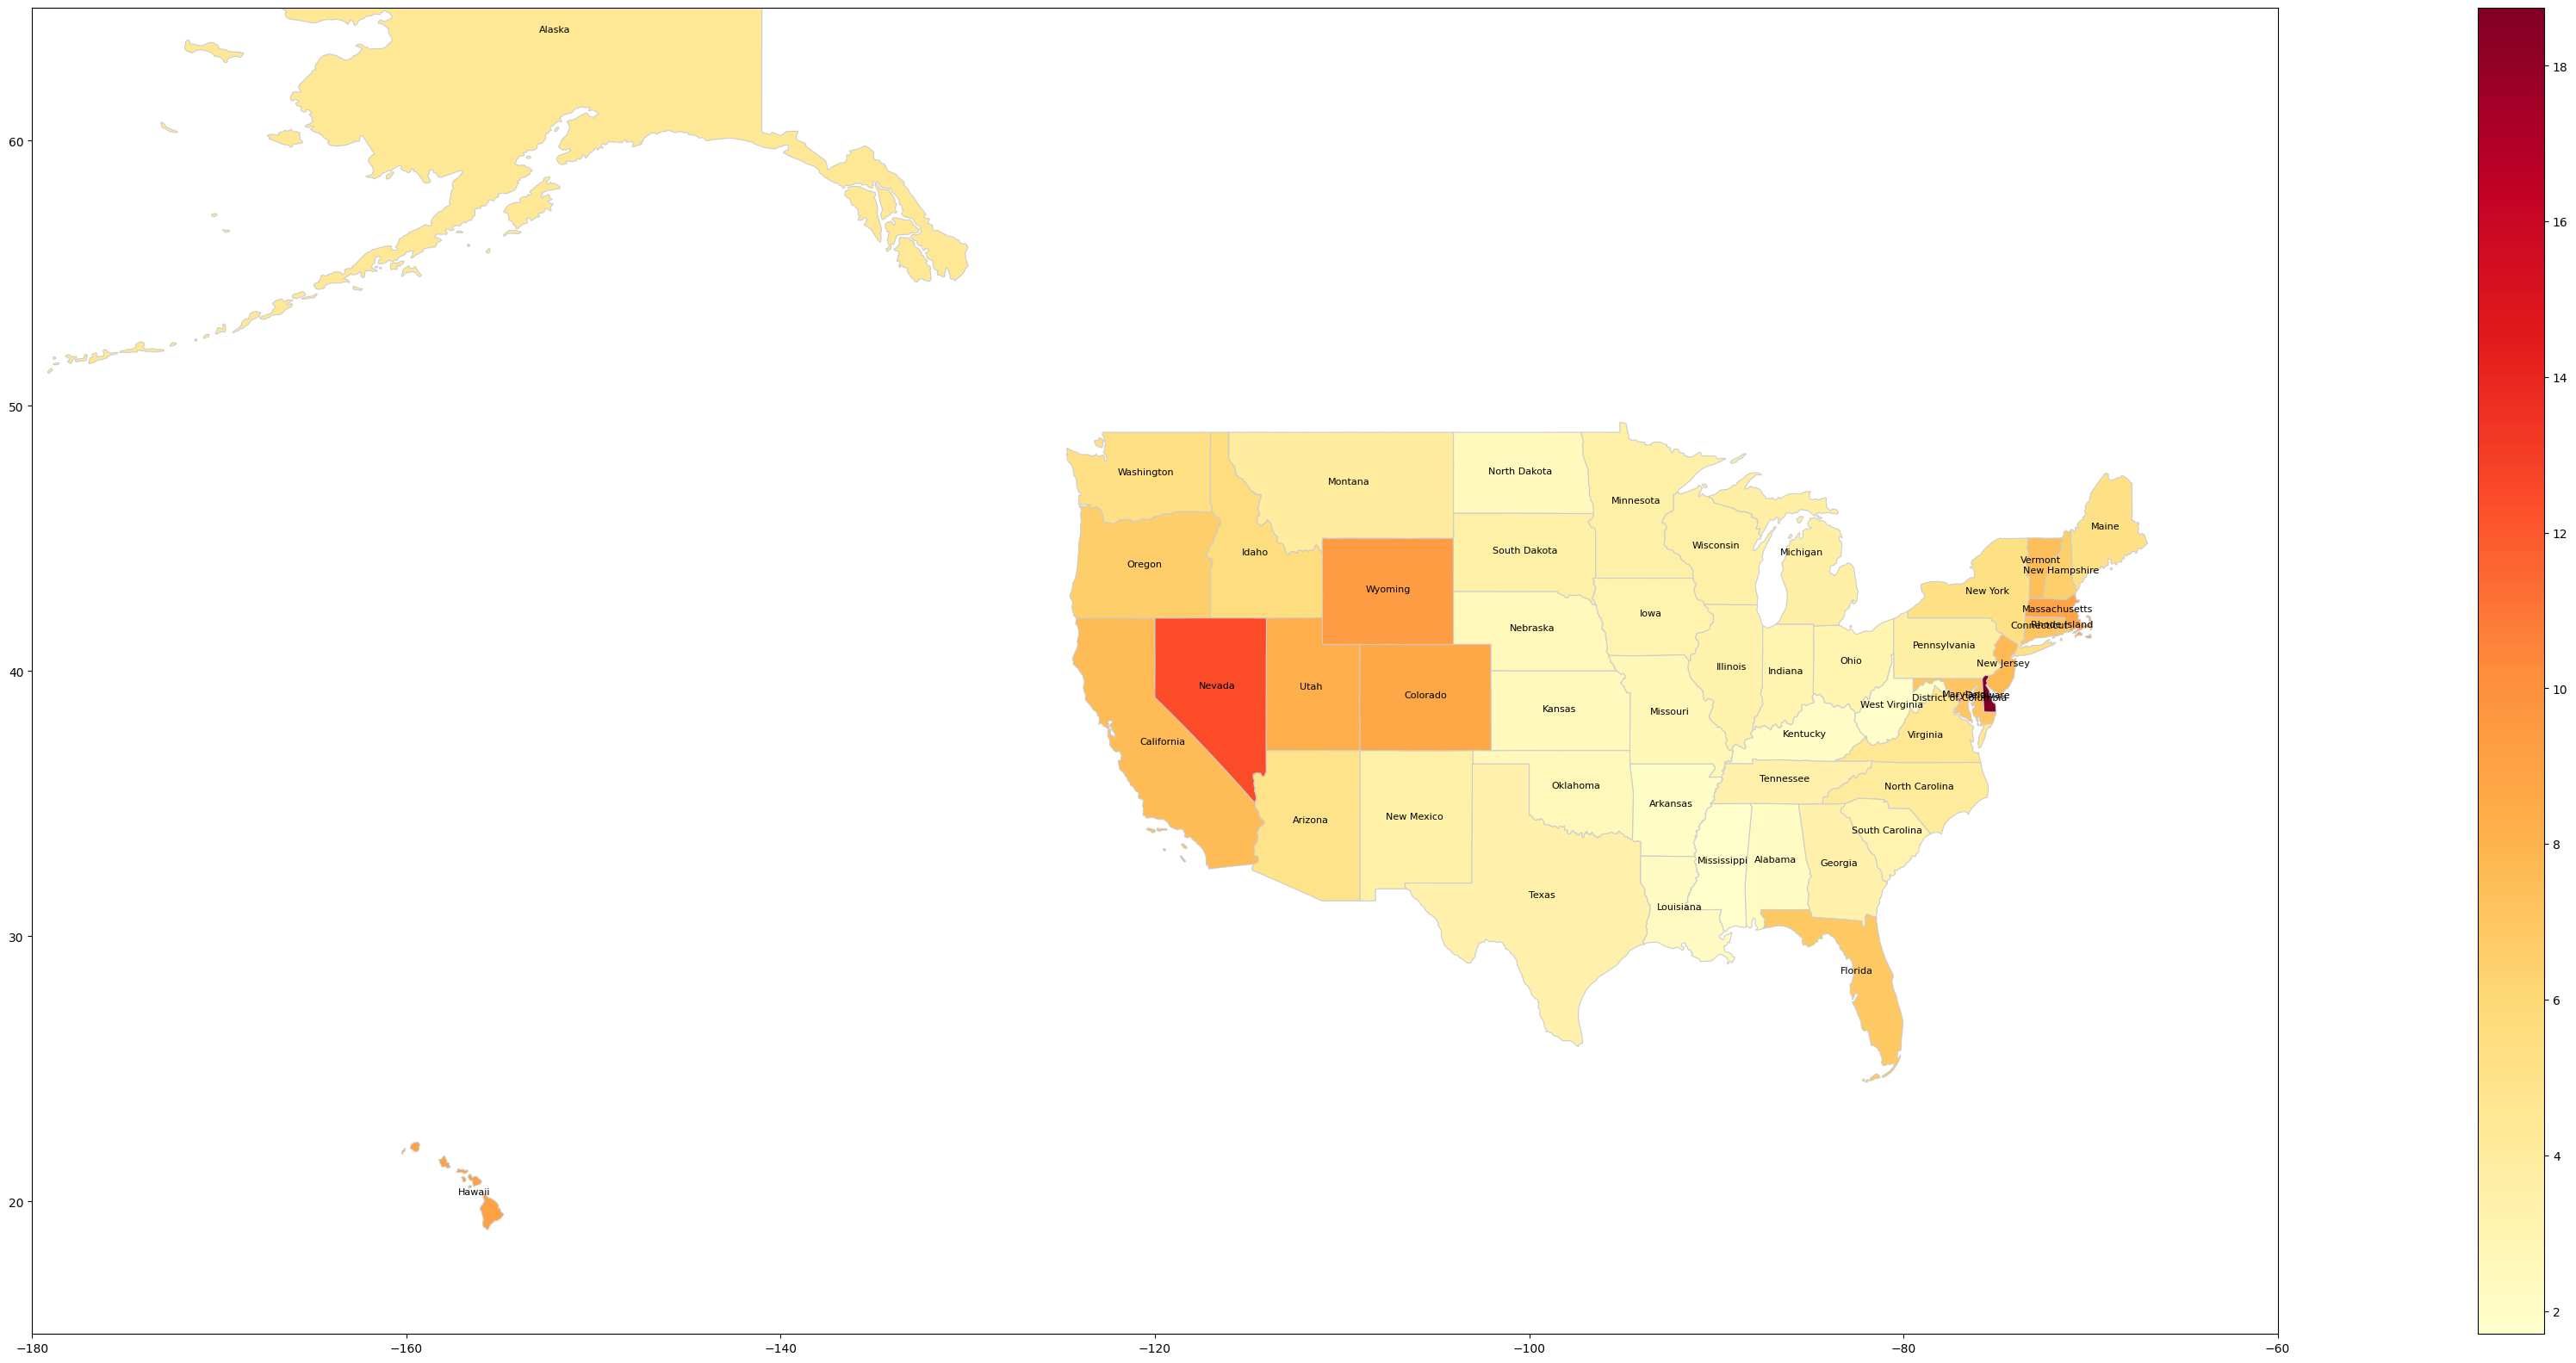

In [ ]:
# A density map showing averge microbusiness_density by state
state_microbusiness_density = df.groupby('state')['microbusiness_density'].mean()

gdf = usa.merge(state_microbusiness_density.reset_index(), left_on='NAME', right_on='state')

fig, ax = plt.subplots(1, 1, figsize=(60, 20))

ax.set_xlim(-180, -60)
ax.set_ylim(15, 65)

gdf.plot(column='microbusiness_density', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['NAME']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.show()

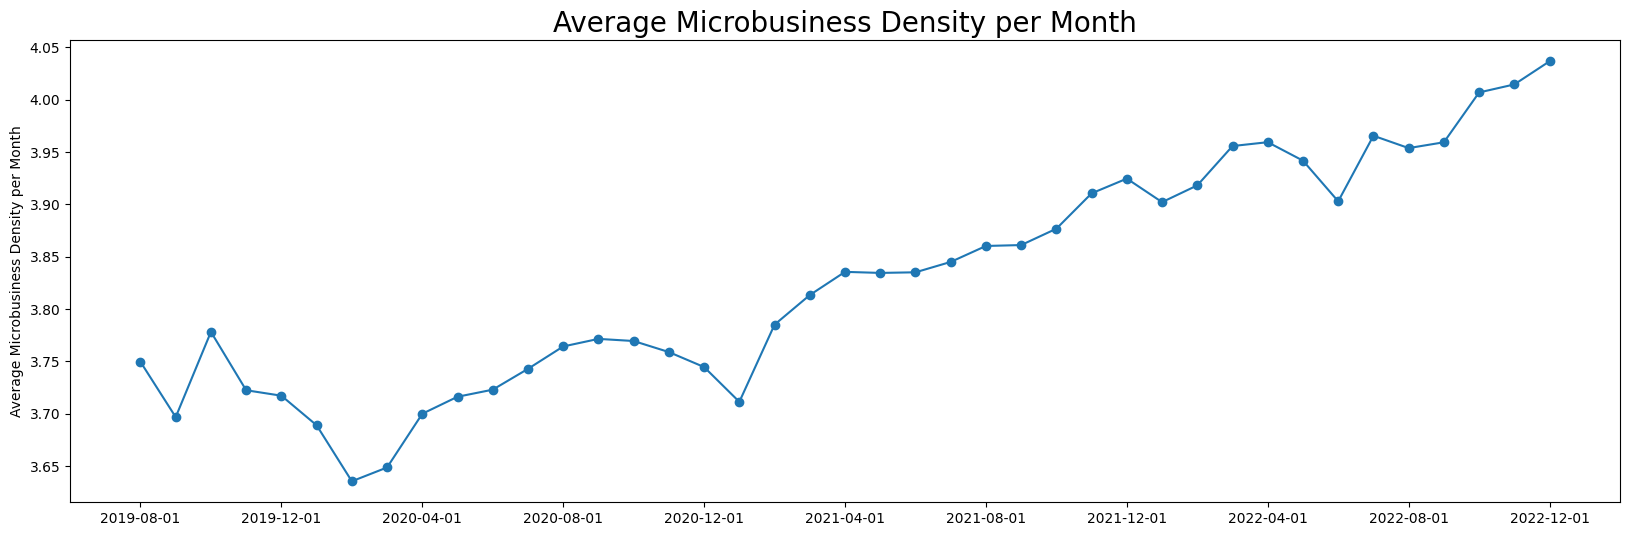

In [ ]:
# Average Microbusiness Density per month
month_microbusiness_density = df.groupby('first_day_of_month').microbusiness_density.mean()

num_ticks = 10

step = len(month_microbusiness_density) // num_ticks

x_ticks = month_microbusiness_density.index[::step]

plt.figure(figsize=(20, 6))
plt.plot(month_microbusiness_density.index, month_microbusiness_density, '-o')

plt.xticks(x_ticks)
plt.ylabel('Average Microbusiness Density per Month')

plt.title('Average Microbusiness Density per Month', size=20)
plt.show()

2.6052777902439024
1.6488392402439023
4.501109964634146
0.06303949002439024
83.47588370731707


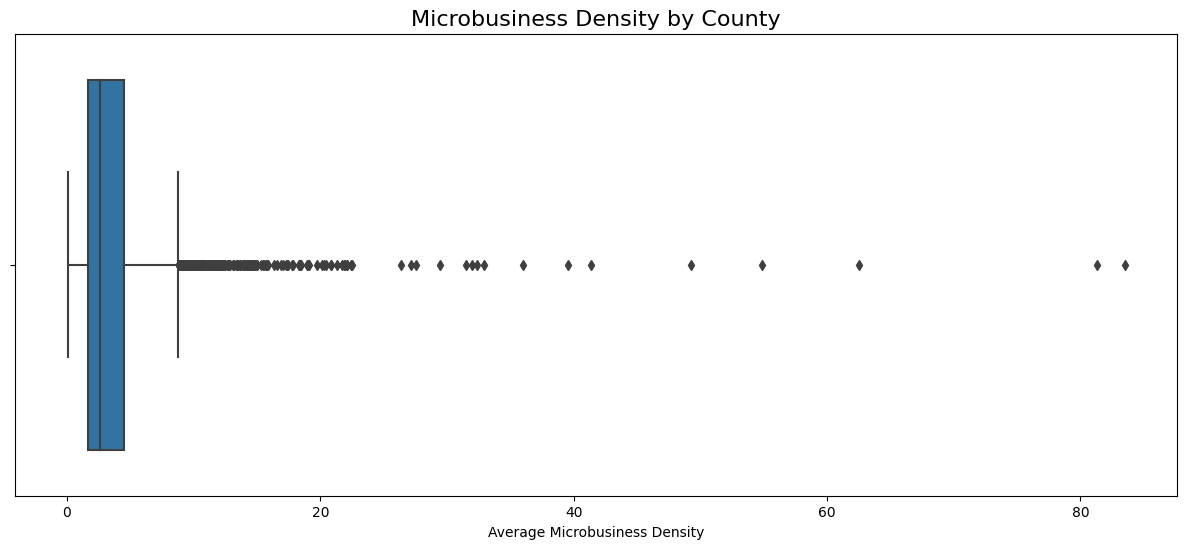

In [ ]:
# County_microbusiness_density
county_microbusiness_density = df.groupby(['state','county'])['microbusiness_density'].mean()
plt.figure(figsize=(15, 6))
sns.boxplot(x=county_microbusiness_density, orient="h")
print(county_microbusiness_density.median())
print(county_microbusiness_density.quantile(0.25))
print(county_microbusiness_density.quantile(0.75))
print(county_microbusiness_density.min())
print(county_microbusiness_density.max())
plt.title('Microbusiness Density by County', size=16)
plt.xlabel('Average Microbusiness Density')
plt.show()

In [ ]:
county_microbusiness_density.sort_values()

state         county            
Mississippi   Issaquena County       0.063039
Georgia       Echols County          0.074536
Virginia      Greensville County     0.164404
Missouri      Douglas County         0.209295
South Dakota  Ziebach County         0.315862
                                      ...    
Idaho         Boundary County       49.293021
Oregon        Union County          54.832256
Colorado      Rio Grande County     62.525772
Wyoming       Sheridan County       81.284400
Nevada        Carson City           83.475884
Name: microbusiness_density, Length: 3135, dtype: float64

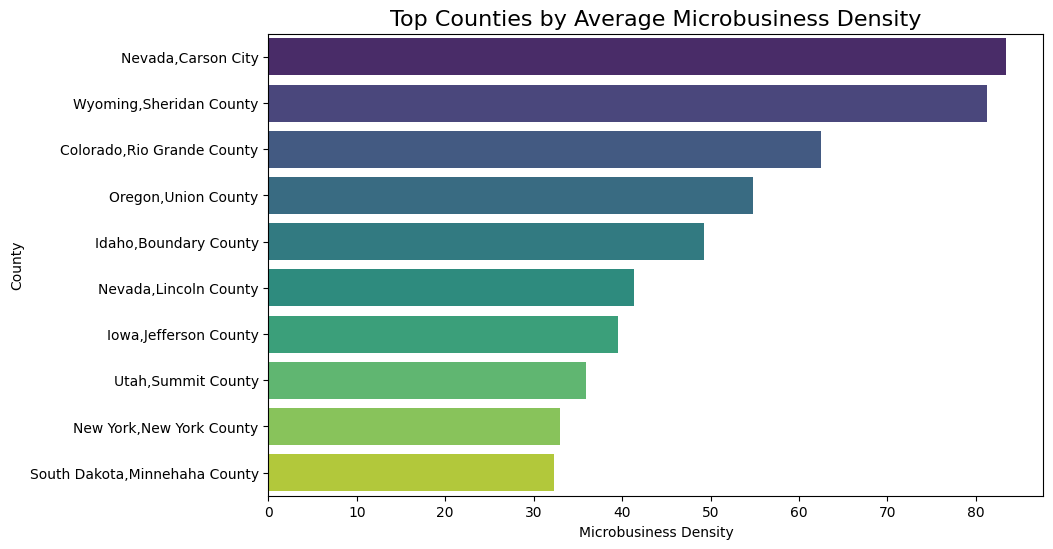

In [ ]:
top_counties = county_microbusiness_density.nlargest(10)
labels = [f'{state},{county}' for state, county in top_counties.index]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counties, y=labels, orient="h", palette="viridis")
plt.title('Top Counties by Average Microbusiness Density', size=16)
plt.xlabel('Microbusiness Density')
plt.ylabel('County')
plt.show()

Text(0.5, 1.0, 'Heatmap of Numerical Features')

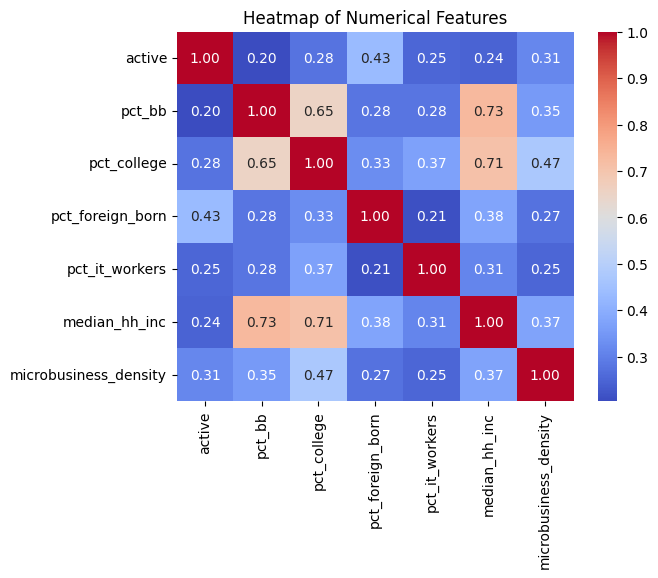

In [ ]:
# Heatmap for numerical variables and the target variable
corr = df[variables + ['microbusiness_density']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True).set_title('Heatmap of Numerical Features')

**Modeling**

Data Prprocessing

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df_X = df.drop(columns=['microbusiness_density','row_id','active','cfips'])
df_y = df['microbusiness_density']

In [ ]:
df_X['first_day_of_month'] = pd.to_datetime(df_X['first_day_of_month'])
df_X['month'] = df_X['first_day_of_month'].dt.month
df_X['year'] = df_X['first_day_of_month'].dt.year

#Try sine/cosine for month
df_X['month_sine'] = np.sin(df_X['month'] * 2 * math.pi / 12)
df_X['month_cosine'] = np.cos(df_X['month'] * 2 * math.pi / 12)

# Drop the original 'month' column
df_X.drop(['month'], axis=1, inplace=True)
df_X

,county,state,first_day_of_month,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,year,month_sine,month_cosine
0,Autauga County,Alabama,2019-08-01,76.6,14.5,2.1,1.3,55317.0,2019,-8.660254e-01,-5.000000e-01
1,Autauga County,Alabama,2019-09-01,76.6,14.5,2.1,1.3,55317.0,2019,-1.000000e+00,-1.836970e-16
2,Autauga County,Alabama,2019-10-01,76.6,14.5,2.1,1.3,55317.0,2019,-8.660254e-01,5.000000e-01
3,Autauga County,Alabama,2019-11-01,76.6,14.5,2.1,1.3,55317.0,2019,-5.000000e-01,8.660254e-01
4,Autauga County,Alabama,2019-12-01,76.6,14.5,2.1,1.3,55317.0,2019,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
128530,Uinta County,Wyoming,2022-12-01,91.4,12.6,2.9,1.7,72458.0,2022,-2.449294e-16,1.000000e+00
128531,Washakie County,Wyoming,2022-11-01,82.8,15.0,2.2,0.9,57306.0,2022,-5.000000e-01,8.660254e-01
128532,Washakie County,Wyoming,2022-12-01,82.8,15.0,2.2,0.9,57306.0,2022,-2.449294e-16,1.000000e+00
128533,Weston County,Wyoming,2022-11-01,79.7,12.7,2.3,0.0,53333.0,2022,-5.000000e-01,8.660254e-01


In [ ]:
states = df.groupby('state').mean(numeric_only=True)['microbusiness_density']
counties = df.groupby('county').mean(numeric_only=True)['microbusiness_density']
df_X['state'] = df_X['state'].apply(lambda x: states[x])
df_X['county'] = df_X['county'].apply(lambda x: counties[x])

In [ ]:
df_X.corrwith(df_y, axis=0, numeric_only=True) #All variables check out

county              0.692536
state               0.372258
pct_bb              0.354072
pct_college         0.474409
pct_foreign_born    0.274378
pct_it_workers      0.252271
median_hh_inc       0.374697
year                0.018204
month_sine         -0.003038
month_cosine       -0.000239
dtype: float64

In [ ]:
X_train = df_X[df_X['first_day_of_month'] <= '2022-03-01'].copy()
X_val = df_X[df_X['first_day_of_month'] > '2022-03-01'].copy()
X_train.drop(columns='first_day_of_month', inplace=True)
X_val.drop(columns='first_day_of_month', inplace=True)
X_train

,county,state,pct_bb,pct_college,pct_foreign_born,pct_it_workers,median_hh_inc,year,month_sine,month_cosine
0,3.178792,2.232029,76.6,14.5,2.1,1.3,55317.0,2019,-8.660254e-01,-5.000000e-01
1,3.178792,2.232029,76.6,14.5,2.1,1.3,55317.0,2019,-1.000000e+00,-1.836970e-16
2,3.178792,2.232029,76.6,14.5,2.1,1.3,55317.0,2019,-8.660254e-01,5.000000e-01
3,3.178792,2.232029,76.6,14.5,2.1,1.3,55317.0,2019,-5.000000e-01,8.660254e-01
4,3.178792,2.232029,76.6,14.5,2.1,1.3,55317.0,2019,-2.449294e-16,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...
122253,1.669885,9.374568,76.8,13.4,1.7,0.0,57031.0,2021,-5.000000e-01,8.660254e-01
122254,1.669885,9.374568,76.8,13.4,1.7,0.0,57031.0,2021,-2.449294e-16,1.000000e+00
122255,1.669885,9.374568,79.7,12.7,2.3,0.0,53333.0,2022,5.000000e-01,8.660254e-01
122256,1.669885,9.374568,79.7,12.7,2.3,0.0,53333.0,2022,8.660254e-01,5.000000e-01


In [ ]:
Y_train = df_y[X_train.index].copy()
Y_val = df_y[X_val.index].copy()

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

# XGBoost/Gradiant Boosting

In [ ]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# XGBoost Regressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, Y_train)
y_pred_xgb = xgb_regressor.predict(X_val)
mse_xgb = mean_squared_error(Y_val, y_pred_xgb)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, Y_train)
y_pred_gb = gb_regressor.predict(X_val)
mse_gb = mean_squared_error(Y_val, y_pred_gb)

# Output the MSE for both models
print(f'Mean Squared Error for XGBoost: {mse_xgb}')
print(f'Mean Squared Error for Gradient Boosting: {mse_gb}')

Mean Squared Error for XGBoost: 13.581440083199938
Mean Squared Error for Gradient Boosting: 17.69335697308363


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 3, 4, 10],
    'learning_rate': [0.1, 0.2, 0.3],
}

# Instantiate XGBRegressor
xgb = XGBRegressor()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

# Extract the best estimator and its performance metrics
best_estimator = grid_search.best_estimator_
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# Output the best parameters and the best score
print("Best parameters found: ", best_params)
print("Best negative mean squared error found: ", best_score)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
Best negative mean squared error found:  -12.034638377422667


In [ ]:
# XGBoost Regressor
xgb_regressor_opt = XGBRegressor(learning_rate=0.3, max_depth=3, n_estimators=50)

xgb_regressor_opt.fit(X_train, Y_train)
y_pred_xgb_opt = xgb_regressor_opt.predict(X_val)
mse_xgb_opt = mean_squared_error(Y_val, y_pred_xgb_opt)

# Output the MSE for both models
print(f'Mean Squared Error for XGBoost after hyperparameter tuning: {mse_xgb_opt}')

Mean Squared Error for XGBoost after hyperparameter tuning: 12.31054206703704


# Linear Regression

In [ ]:
X_train

array([[-0.18523799, -0.84730825,  0.29389183, ..., -1.63339652,
        -1.16041675, -0.88006434],
       [-0.18523799, -0.84730825,  0.29389183, ..., -1.63339652,
        -1.34572472, -0.1478996 ],
       [-0.18523799, -0.84730825,  0.29389183, ..., -1.63339652,
        -1.16041675,  0.58426514],
       ...,
       [-0.61589443,  2.94513349,  0.6238788 , ...,  1.85118272,
         0.72901156,  1.12024692],
       [-0.61589443,  2.94513349,  0.6238788 , ...,  1.85118272,
         1.23528234,  0.58426514],
       [-0.61589443,  2.94513349,  0.6238788 , ...,  1.85118272,
         1.42059031, -0.1478996 ]])

In [ ]:
alpha_range = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
# L1 Regularization - Lasso Regression
lasso = Lasso()
lasso_grid = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alpha_range), cv=5)
lasso_grid.fit(X_train, Y_train)

# Optimal alpha for Lasso
best_alpha_lasso = lasso_grid.best_params_['alpha']

In [ ]:
# L2 Regularization - Ridge Regression
ridge = Ridge()
ridge_grid = GridSearchCV(estimator=ridge, param_grid=dict(alpha=alpha_range), cv=5)
ridge_grid.fit(X_train, Y_train)

# Optimal alpha for Ridge
best_alpha_ridge = ridge_grid.best_params_['alpha']

In [ ]:
# Elastic Net (Combination of L1 and L2)
elastic_net = ElasticNet()
param_grid = {'alpha': alpha_range, 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_net_grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5)
elastic_net_grid.fit(X_train, Y_train)

# Optimal alpha and l1_ratio for Elastic Net
best_alpha_elastic = elastic_net_grid.best_params_['alpha']
best_l1_ratio = elastic_net_grid.best_params_['l1_ratio']

In [ ]:
y_pred_lasso = lasso_grid.predict(X_val)
mse_lasso = mean_squared_error(Y_val, y_pred_lasso)

y_pred_ridge = ridge_grid.predict(X_val)
mse_ridge = mean_squared_error(Y_val, y_pred_ridge)

y_pred_elastic_net = elastic_net_grid.predict(X_val)
mse_elastic_net = mean_squared_error(Y_val, y_pred_elastic_net)

In [ ]:
print("Mean Squared Errors:")
print(f"Lasso Regression: {mse_lasso}")
print(f"Ridge Regression: {mse_ridge}")
print(f"Elastic Net: {mse_elastic_net}")

Mean Squared Errors:
Lasso Regression: 17.78926723786705
Ridge Regression: 17.782769774764382
Elastic Net: 17.972874072089304


In [ ]:
best_model = ridge_grid.best_estimator_
coefficients = best_model.coef_

features = ['county',	'state',	'pct_bb',	'pct_college',	'pct_foreign_born',	'pct_it_workers',	'median_hh_inc',	'year',	'month_sine',	'month_cosine']
feature_importance = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

# Sort the features by the absolute value of their coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                  Coefficient  Absolute Coefficient
county               2.748755              2.748755
pct_college          0.824260              0.824260
state                0.470095              0.470095
pct_it_workers       0.144454              0.144454
pct_bb               0.140824              0.140824
pct_foreign_born     0.100861              0.100861
median_hh_inc       -0.056015              0.056015
month_sine          -0.038137              0.038137
year                 0.022174              0.022174
month_cosine         0.003769              0.003769


# Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense

In [ ]:
X_train_reshape = X_train.reshape([X_train.shape[0], 1, X_train.shape[1]])
X_val_reshape = X_val.reshape([X_val.shape[0], 1, X_val.shape[1]])

In [ ]:
model = Sequential([
    Dense(8, activation='relu', input_shape=(10,)),
    Dropout(rate=0.25),
    Dense(4, activation='relu'),
    Dropout(rate=0.25),
    Dense(2, activation='relu'),
    Dropout(rate=0.25),
    Dense(1, activation='linear'),
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error']) #MSE
model.fit(X_train, Y_train, epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
3135/3135 [==============================] - 16s 5ms/step - loss: 20.3844 - mean_squared_error: 20.3844 - val_loss: 22.0709 - val_mean_squared_error: 22.0709
Epoch 2/20
3135/3135 [==============================] - 9s 3ms/step - loss: 17.0870 - mean_squared_error: 17.0870 - val_loss: 21.2608 - val_mean_squared_error: 21.2608
Epoch 3/20
3135/3135 [==============================] - 10s 3ms/step - loss: 15.5669 - mean_squared_error: 15.5669 - val_loss: 20.2234 - val_mean_squared_error: 20.2234
Epoch 4/20
3135/3135 [==============================] - 10s 3ms/step - loss: 15.9573 - mean_squared_error: 15.9573 - val_loss: 20.1999 - val_mean_squared_error: 20.1999
Epoch 5/20
3135/3135 [==============================] - 8s 3ms/step - loss: 16.0633 - mean_squared_error: 16.0633 - val_loss: 20.6242 - val_mean_squared_error: 20.6242
Epoch 6/20
3135/3135 [==============================] - 10s 3ms/step - loss: 16.0539 - mean_squared_error: 16.0539 - val_loss: 20.1938 - val_mean_squared_err

In [ ]:
model_gru = Sequential([
    GRU(64, input_shape=(1, 10)),
    Dropout(rate=0.25),
    Dense(32, activation='relu'),
    Dropout(rate=0.25),
    Dense(16, activation='relu'),
    Dropout(rate=0.25),
    Dense(8, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='relu'),
    Dropout(rate=0.25),
    Dense(2, activation='relu'),
    Dropout(rate=0.25),
    Dense(1, activation='linear'),
])
model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error']) #MSE
model_gru.fit(X_train_reshape, Y_train, epochs=20, verbose=1, validation_data=(X_val_reshape, Y_val))

Epoch 1/20
3135/3135 [==============================] - 19s 5ms/step - loss: 19.9476 - mean_squared_error: 19.9476 - val_loss: 21.4500 - val_mean_squared_error: 21.4500
Epoch 2/20
3135/3135 [==============================] - 14s 5ms/step - loss: 16.6967 - mean_squared_error: 16.6967 - val_loss: 20.3254 - val_mean_squared_error: 20.3254
Epoch 3/20
3135/3135 [==============================] - 15s 5ms/step - loss: 15.8577 - mean_squared_error: 15.8577 - val_loss: 20.9388 - val_mean_squared_error: 20.9388
Epoch 4/20
3135/3135 [==============================] - 16s 5ms/step - loss: 15.9863 - mean_squared_error: 15.9863 - val_loss: 19.6983 - val_mean_squared_error: 19.6983
Epoch 5/20
3135/3135 [==============================] - 16s 5ms/step - loss: 16.8230 - mean_squared_error: 16.8230 - val_loss: 17.2590 - val_mean_squared_error: 17.2590
Epoch 6/20
3135/3135 [==============================] - 16s 5ms/step - loss: 15.3829 - mean_squared_error: 15.3829 - val_loss: 19.2675 - val_mean_squared_e

In [ ]:
model_lstm = Sequential([
    LSTM(64, input_shape=(1, 10)),
    Dropout(rate=0.25),
    Dense(32, activation='relu'),
    Dropout(rate=0.25),
    Dense(16, activation='relu'),
    Dropout(rate=0.25),
    Dense(8, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='relu'),
    Dropout(rate=0.25),
    Dense(2, activation='relu'),
    Dropout(rate=0.25),
    Dense(1, activation='linear'),
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error']) #MSE
model_lstm.fit(X_train_reshape, Y_train, epochs=20, verbose=1, validation_data=(X_val_reshape, Y_val))

Epoch 1/20
3135/3135 [==============================] - 21s 6ms/step - loss: 30.0118 - mean_squared_error: 30.0118 - val_loss: 35.3934 - val_mean_squared_error: 35.3934
Epoch 2/20
3135/3135 [==============================] - 15s 5ms/step - loss: 23.9141 - mean_squared_error: 23.9141 - val_loss: 33.2581 - val_mean_squared_error: 33.2581
Epoch 3/20
3135/3135 [==============================] - 15s 5ms/step - loss: 23.4630 - mean_squared_error: 23.4630 - val_loss: 33.1992 - val_mean_squared_error: 33.1992
Epoch 4/20
3135/3135 [==============================] - 16s 5ms/step - loss: 23.4607 - mean_squared_error: 23.4607 - val_loss: 33.1995 - val_mean_squared_error: 33.1995
Epoch 5/20
3135/3135 [==============================] - 16s 5ms/step - loss: 23.4600 - mean_squared_error: 23.4600 - val_loss: 33.1871 - val_mean_squared_error: 33.1871
Epoch 6/20
3135/3135 [==============================] - 15s 5ms/step - loss: 23.4610 - mean_squared_error: 23.4610 - val_loss: 33.1979 - val_mean_squared_e